## Step 2: Let's read a set of monthly data from the CSV

## Step 2: Let's read a set of monthly data from the CSV

In [1]:
import csv
from collections import defaultdict  #provide default values for null keys
from datetime import datetime

import matplotlib.pyplot as plt

monthly_data = defaultdict(list)
p = print

# Step 1: Read CSV file and organize data by month
import requests
from io import StringIO

# Download the CSV from R2
response = requests.get('https://dse200.dev/Day2/temperatures.csv')
csv_content = StringIO(response.text)

theReader = csv.DictReader(csv_content)
theCols = theReader.fieldnames[:3]
theMonthCol = theCols[2]
for row in theReader:
    if all(row[col].strip() != '' for col in theCols):
        theDate = datetime.strptime(row['date'], '%Y-%m-%d')
        theKey = theDate.strftime('%Y-%m')
        monthly_data[theKey].append(float(row[theMonthCol]))

p(monthly_data)

#add code...

defaultdict(<class 'list'>, {'2023-07': [23.7, 24.9, 8.1, 38.3, 3.6, 30.1, 3.8, 39.9, 6.0, 37.8, 7.6, 27.3, 26.4, 4.0, 11.6, 30.2, 5.6, 30.8, 11.1, 7.7, 27.8, 24.7, 24.3, 9.3, 17.4, 11.2, 26.6, 11.2, 28.1, 5.7, 35.9, 37.2, 22.0, 0.1, 23.4, 30.9, 38.8, 18.5, 18.7, 30.4, 2.7, 2.7, 18.4, 3.0, 5.3, 16.7, 2.8, 3.0, 25.1, 11.8, 24.8, 7.1, 21.4, 15.1, 17.4, 8.0, 2.8, 18.6, 1.8, 19.5, 29.3, 39.4, 5.1, 3.3, 7.8, 5.8, 39.6, 7.0, 17.7, 20.4, 16.9, 12.3, 36.6, 3.6, 6.0, 20.2, 32.0, 18.2, 12.6, 24.9, 16.6, 12.6, 25.7, 9.2, 32.4, 31.0, 16.9, 7.0, 0.2, 0.4, 13.0, 33.6, 24.4, 3.2, 22.6, 25.6, 28.0, 26.5, 25.0, 18.1, 10.1, 8.5, 35.4, 10.4, 31.7, 19.6, 11.8, 36.3, 11.9, 38.8, 7.3, 10.7, 19.8, 0.3, 19.2, 21.1, 18.2, 8.0, 19.8, 22.4, 9.8, 36.5, 18.8, 38.9, 3.7, 8.6, 31.9, 24.1, 5.9, 5.0, 2.4, 22.7, 10.3, 6.2, 9.1, 39.2, 39.3, 10.9, 31.5, 18.9, 25.4, 19.3, 13.0, 31.4, 18.9, 16.1, 7.2, 26.8, 4.6, 26.6, 12.8, 19.5, 8.5, 13.8, 2.1, 15.2, 14.6, 14.4, 31.8, 22.8, 30.6, 18.6, 25.0, 1.1, 24.9, 18.5, 18.0, 36.8, 1

## Step 3: Let's gather and order the monthly stats

In [2]:
#capture avg, min, max data for each date...

monthly_stats = []

#add code...
for theDate, temps in monthly_data.items():
    avg_temp = sum(temps) / len(temps)
    min_temp = min(temps)
    max_temp = max(temps)
    monthly_stats.append((theDate, avg_temp, min_temp, max_temp))

monthly_stats.sort()  #sort it...

p(monthly_stats)

#fetch some data for our plots

months = [month for month, _, _, _ in monthly_stats]
avg_temps = [avg_temp for _, avg_temp, _, _ in monthly_stats]


[('2023-01', 20.579153094462537, 0.5, 39.9), ('2023-02', 19.78712121212122, 0.0, 39.8), ('2023-03', 19.738111888111895, 0.0, 40.0), ('2023-04', 20.914705882352944, 0.0, 39.9), ('2023-05', 20.99612903225805, 0.2, 39.9), ('2023-06', 20.575257731958743, 0.3, 40.0), ('2023-07', 18.42664670658682, 0.1, 39.9), ('2023-08', 18.860596026490057, 0.0, 39.7), ('2023-09', 19.880936454849497, 0.0, 40.0), ('2023-10', 19.72686567164178, 0.2, 40.0), ('2023-11', 18.667365269461058, 0.0, 40.0), ('2023-12', 19.037898089171986, 0.1, 39.9)]


## Step 4: Let's visualize some data...

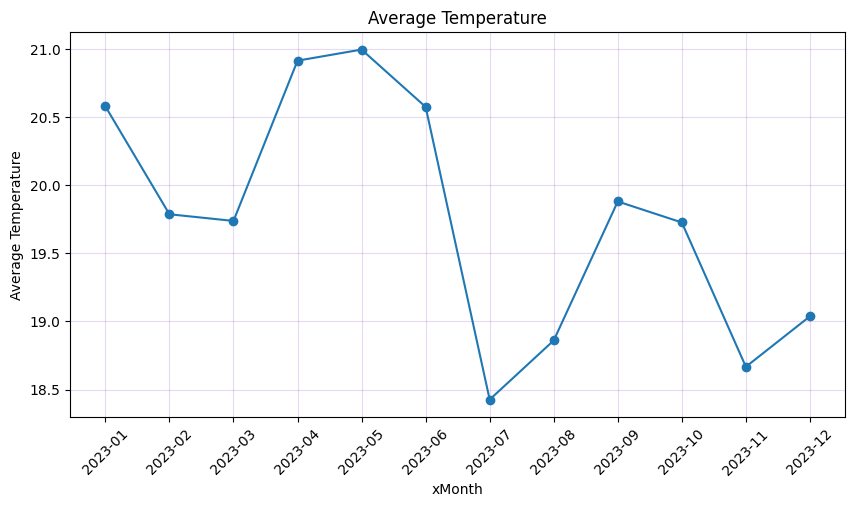

In [3]:
# Now write the actual plot code

plt.figure(figsize=(10, 5))

plt.plot(months, avg_temps, marker='o')
plt.xlabel('xMonth')
plt.ylabel('Average Temperature')
plt.title('Average Temperature')
plt.grid(True, color='#8844bb', alpha=0.2)
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

## Just for fun, lets save some data...

In [4]:
# Step 4: Save the results to a new CSV file
output_path = 'monthly_temperature_stats_plain_python.csv'

with open(output_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Month', 'Average Temperature', 'Min Temperature', 'Max Temperature'])
    writer.writerows(monthly_stats)

# Display the calculated monthly statistics to the user
monthly_stats

[('2023-01', 20.579153094462537, 0.5, 39.9),
 ('2023-02', 19.78712121212122, 0.0, 39.8),
 ('2023-03', 19.738111888111895, 0.0, 40.0),
 ('2023-04', 20.914705882352944, 0.0, 39.9),
 ('2023-05', 20.99612903225805, 0.2, 39.9),
 ('2023-06', 20.575257731958743, 0.3, 40.0),
 ('2023-07', 18.42664670658682, 0.1, 39.9),
 ('2023-08', 18.860596026490057, 0.0, 39.7),
 ('2023-09', 19.880936454849497, 0.0, 40.0),
 ('2023-10', 19.72686567164178, 0.2, 40.0),
 ('2023-11', 18.667365269461058, 0.0, 40.0),
 ('2023-12', 19.037898089171986, 0.1, 39.9)]